In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import recall_score, f1_score, accuracy_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from argparse import Namespace
import warnings

warnings.filterwarnings('ignore')

In [2]:
def apply_lr(my_dataset_symptoms):

    # dataset_symptoms = pd.get_dummies(dataset_symptoms, columns=[symptoms_select]) # one-hot, only 2 kinds of labels, do not need one-hot
    dataset_symptoms = shuffle(my_dataset_symptoms).reset_index(drop=True) # disrupt the order
    # split training dataset and test dataset
    X = dataset_symptoms.iloc[:, :-1]
    Y = dataset_symptoms.iloc[:, -1:]
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

    # normalisation
    X_scaler = StandardScaler().fit(X_train)
    standardized_X_train = X_scaler.transform(X_train)
    standardized_X_test = X_scaler.transform(X_test)

    # Initialising the model and training
    log_reg = linear_model.LogisticRegression(penalty='l2', C=0.000001, solver='liblinear', class_weight = 'balanced',random_state=10)
    log_reg.fit(X_train, y_train)

    # prediction and results
    pred_test = log_reg.predict_proba(standardized_X_test)
    pred_train = log_reg.predict(standardized_X_train)
    pred_test = log_reg.predict(standardized_X_test)

    train_recall = recall_score(y_train, pred_train, average="binary")
    train_f1 = f1_score(y_train, pred_train, average='binary')
    train_acc = accuracy_score(y_train, pred_train)

    test_recall = recall_score(y_test, pred_test,average="binary")
    test_f1 = f1_score(y_test, pred_test, average='binary')
    test_acc = accuracy_score(y_test, pred_test)

    return train_recall, test_recall, train_f1, test_f1, train_acc, test_acc

In [3]:
DATA_DIR_BASELINE = os.path.join('dataset_all_baseline.csv')
dataset_baseline = pd.read_csv(DATA_DIR_BASELINE)
dataset_all_events = pd.DataFrame(dataset_baseline, columns=dataset_baseline.columns[1:])
dataset_all_events

,gait_avg,gait_cv,label
0,0.129408,1.078659,0
1,0.278847,1.077981,0
2,0.194604,1.040161,0
3,0.079581,2.107202,0
4,0.125491,1.251656,0
...,...,...,...
14545,0.147948,1.031817,1
14546,0.072722,1.968665,1
14547,0.185540,0.931877,1
14548,0.147264,1.011337,1


(0.0, 1.0)

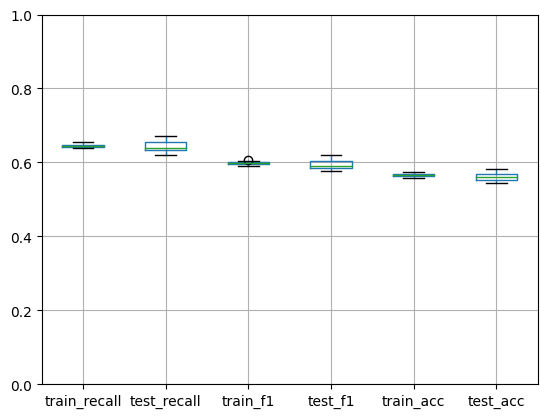

In [4]:
# pre-processing dataset
dataset_all_events = pd.DataFrame(dataset_baseline, columns=dataset_baseline.columns[1:])

# model and test, lr
train_recall_lr = []
test_recall_lr = []

train_f1_lr = []
test_f1_lr = []

train_acc_lr = []
test_acc_lr = []

for i in range(30):

    # # balance negative and positive lables
    dataset_num = dataset_all_events.label.value_counts().min()
    dataset_symptoms_negative = dataset_all_events[dataset_all_events['label']==0].sample(dataset_num)
    dataset_symptoms_positive = dataset_all_events[dataset_all_events['label']==1].sample(dataset_num)
    dataset_symptoms = pd.concat([dataset_symptoms_negative, dataset_symptoms_positive])
    dataset_symptoms = pd.DataFrame(dataset_symptoms, columns=['gait_avg','gait_cv','label'])

    train_recall_lr_i, test_recall_lr_i, train_f1_lr_i, test_f1_lr_i, train_acc_lr_i, test_acc_lr_i = apply_lr(dataset_symptoms)
    
    train_recall_lr.append(train_recall_lr_i)
    test_recall_lr.append(test_recall_lr_i)

    train_f1_lr.append(train_f1_lr_i)
    test_f1_lr.append(test_f1_lr_i)

    train_acc_lr.append(train_acc_lr_i)
    test_acc_lr.append(test_acc_lr_i)

train_recall_lr = pd.DataFrame(train_recall_lr, columns=['train_recall'])
test_recall_lr = pd.DataFrame(test_recall_lr, columns=['test_recall'])

train_f1_lr = pd.DataFrame(train_f1_lr, columns=['train_f1'])
test_f1_lr = pd.DataFrame(test_f1_lr, columns = ['test_f1'])

train_acc_lr = pd.DataFrame(train_acc_lr, columns=['train_acc'])
test_acc_lr = pd.DataFrame(test_acc_lr, columns=['test_acc'])


all_events_lr = pd.concat([train_recall_lr, test_recall_lr, train_f1_lr, test_f1_lr, train_acc_lr, test_acc_lr],axis=1)
all_events_lr.boxplot()  
plt.ylim(0,1) 
plt.show()

In [6]:
all_events_lr.to_csv('evaluation_baseline_LR.csv')